*Projet Probabilité Appliqué:*
> + MITCHOZOUNOU Sagbo Jean-Claude
> + LONMANDON Géofroid

# 1 Simulation des V.A à valeurs dans un ensemble fini et les chaînes de Markov.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([[1/2,1/2,0],[0,0,1],[1,0,0]])

## 1.1 Généralités sur les chaînes de Markov.

+  1- Réalisons une fonction python accessibleN(i, j, P, N) qui demande comme arguments l’état i, l’état j la matrice de passage P et un entier N. la fonction accessibleN(i, j, P, N) doit retourner 1 s’il existe un chemin de longueur N de i vers j et 0 sinon.


In [29]:

def accessibleN(i,j,P,N):
    P_N = np.linalg.matrix_power(P,N)
    if P_N[i-1,j-1]!=0:
        return 1
    else:
        return 0
K = accessibleN(3,1,A,3)
K

1

+ 2- Réalisons une fonction python accessible(i, j, P) qui demande comme arguments l’état i, l’état j et la matrice de passage P. la fonction accessible(i, j, P) doit retourner 1 s’il existe un chemin de i vers j et 0 sinon.

In [30]:
def accessible(i,j,P):
    m = len(P)
    n = 0
    for N in range(1,m+1):
        n += accessibleN(i,j,P,N)
    if n!=0:
        return 1
    else:
        return 0

G = accessible(3,3,A)
G

1

+ 3- Réalisons une fonction recurrente(i, P) qui demande comme argument un état i et la matrice de passage P et qui retourne 1 si l’état i est récurrente et 0 sinon

In [31]:
def reccurente(i,P):
    m = len(P)
    A_i =[]
    n = 0
    for j in range(1,m+1):
        if j!=i and accessible(i,j,P):
            A_i.append(j)

    if A_i!= []:
        for k in A_i:
            n += accessible(k,i,P)
        if n == len(A_i):
            return 1
        else:
            return 0
    else:
        return 0



l = reccurente(1,A)
l

1

+ 4- Réalisons une fonction python classes(P) qui demande comme argument la matrice de passage P et qui retourne les classes de la chaîne $(X_n)$

In [32]:
def classes(P):
    num_etats = len(P)
    classes_list = []

    for i in range(1,num_etats+1):
        if not any(i in classe for classe in classes_list):
            classe_actuelle = {i}
            for j in range(1,num_etats+1):
                if i != j and accessible(i, j, P) and accessible(j, i, P):
                    classe_actuelle.add(j)
            classes_list.append(classe_actuelle)

    return classes_list
classes(A)

[{1, 2, 3}]

+ 5- Créeons une fonction python recurrente(P) qui demande comme argument la matrice de transition P et qui retourne les états récurrents

In [33]:
def reccurente_State(P):
    m = len(P)
    R =[]
    for j in range(1,m+1):
        if reccurente(j,P):
            R.append(j)
    return R

L = reccurente_State(A)
L

[1, 2, 3]

## 1.2 Exemple de simulation et vérification du théorème Ergodic.

In [34]:
P = np.array([[0,0,1,0],
              [0.2,0.3,0,0.5],
              [0.1,0,0,0.9],
              [0,0.3,0.7,0]])
P

array([[0. , 0. , 1. , 0. ],
       [0.2, 0.3, 0. , 0.5],
       [0.1, 0. , 0. , 0.9],
       [0. , 0.3, 0.7, 0. ]])

In [35]:
P_0 = [0.2,0.1,0.4,0.3]
P_0


[0.2, 0.1, 0.4, 0.3]

+ 1- Créons une fonction python simulationX(S) qui demande comme argument une liste $S = [s_1 , ..., s_m ]$ et qui caractérise (comme retour) la simulation d’une variable aléatoire définie par : $X(\Omega) = {1, 2, ..., m = card(S)}$ et $P(X = i) = s_i$.

In [36]:
def simulationX(S):
    Interv = [0]
    for p in S:
        Interv.append(Interv[len(Interv)-1]+p) # Calcul des sommes des d'ordre k  des s_i et stockage

    u = np.random.uniform()

    for i in range(1,len(Interv)):
        if Interv[i-1]<= u < Interv[i]:   #  Interv[i]-Interv[i-1] = s_i = P(X = i)
            return i


# Test
S = [0.2,0.5,0.3]

simulationX(S)

2

+ 2- En utilisant la fonction précédente , réalisons 100000 observation selon $X_0$ . tester
la loi des grandes nombres ( comparer entre $P(X_0 = i)$ et la fréquence de i dans
l’enchantant obtenu).

In [37]:
freq = np.zeros(len(P_0))
for i in range(10000):
    état = simulationX(P_0)
    for j in range(1,len(P_0)+1):
        if état == j:
            freq[j-1] += 1

freq

P_simul = freq/10000

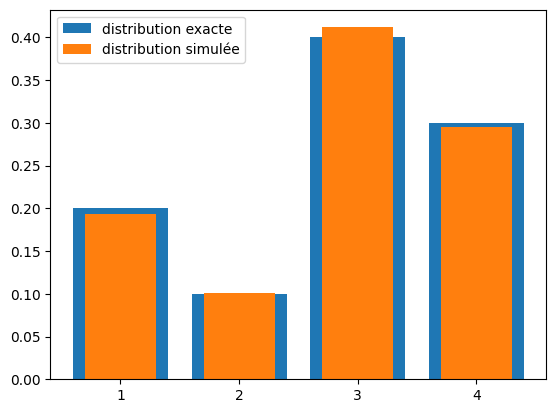

In [38]:
plt.figure()
plt.bar([1,2,3,4],P_0, label = "distribution exacte", width=0.8)
plt.bar([1,2,3,4],P_simul, label = "distribution simulée", width=0.6)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,3,4])
plt.legend()

+ 3- Créeons une fonction python T rajectoire(l) qui demande comme argument un entier
l et qui retourne une liste $[X_0 , X_1 , ...X_l ]$ (cette fonction nous donne une trajectoire
la la chaîne de Markov $(X_n )$ de 0 jusqu’à l.

In [39]:
def Trajectoire(l):
    Trajet = []
    for l in range(l+1):
        Trajet.append(simulationX(np.dot(P_0,np.linalg.matrix_power(P,l))))
    return Trajet

Trajectoire(5)

[3, 4, 4, 4, 4, 2]

+ 4- Créer une fonction python qui donne une approximation de la mesure invariante
π

In [40]:
def Distrib_Stationnaire(N): #Approximation pour N quelconque

    Mat = np.zeros((N,len(P)))
    for l in range(1,N+1):
        Mat[l-1,:]=np.dot(P_0,np.linalg.matrix_power(P,l)) #Calcul des vecteurs de probab d'états et leur somme.
    return np.sum(Mat,axis = 0)/N

for i in [5,10,50,100,1000,10000]:
    print(Distrib_Stationnaire(i))
print("Une approximation de la distribution statioonaire est: ", Distrib_Stationnaire(10000))

[0.0662956 0.1604178 0.3653498 0.4079368]
[0.0682572  0.16655868 0.35815657 0.40702756]
[0.0695731  0.17188108 0.35393445 0.40461137]
[0.06974442 0.17253523 0.35336503 0.40435532]
[0.06989939 0.17312267 0.35284774 0.4041302 ]
[0.06991489 0.17318141 0.352796   0.4041077 ]
Une approximation de la distribution statioonaire est:  [0.06991489 0.17318141 0.352796   0.4041077 ]


In [41]:
 # Vérification  
A = np.array([[1,-0.2,-0.1,0],
              [0,0.7,0,-0.3],
              [0,0.5,0.9,-1],
              [1,1,1,1]])
b = [0,0,0,1]
pi = np.linalg.solve(A,b)
pi



array([0.06991661, 0.17318794, 0.35279025, 0.4041052 ])

+ 5- Créer une fonction python T (i) qui demande comme argument un état i et qui
caractérise le temps de premier retour à l’état i

In [42]:

def T(i):
    P_0 = [0.2,0.1,0.4,0.3]
    meet_i = []
    count=0
    k= 0
    while True and k<2:
        j = simulationX(P_0)
        P_0 = np.dot(P_0,P)
        count+=1
        if j==i:
            meet_i.append(count)
            k+=1

    return meet_i[1]-meet_i[0] # Ici

T(1) # ici le temps de premier retour est retourné sans tenir compte de l'instant
     # où il entre pour la première fois dans l'état i.


18

+ 6-En utilisant la loi des grandes nombres, donner une approximation de E (T (i)).


In [43]:
# Approximation des ET(i)
M = 10000 # Nombre de fois simuler
def ET(i):
    t = 0
    for k in range(M):
        t+= T(i)
    return t/M

ET_i = []
for i in range(1,len(P_0)+1):
    ET_i.append(ET(i))

In [44]:
print(ET_i)

[14.2635, 5.8076, 2.7866, 2.4538]


+ Comparaison entre $\pi_i$ et $\frac{1}{E(T(i))}$ pour chaque 1 ≤ i ≤ 4

In [48]:
Inv_ET_i = [1/k for k in ET_i]
Dist = Distrib_Stationnaire(M)
print("Inverse des ET(i)",Inv_ET_i)
print("Distribution stationnaire", Dist)
print("Erreur en norme L1", np.sum(np.abs(Inv_ET_i-Dist)))
print("Erreur en norme L2", np.linalg.norm(Inv_ET_i-Dist))
print("Erreur en norme L_infini", np.max(np.abs(Inv_ET_i-Dist)))

Inverse des ET(i) [0.07010901952536193, 0.172188167229148, 0.3588602598148281, 0.4075311761349743]
Distribution stationnaire [0.06991489 0.17318141 0.352796   0.4041077 ]
Erreur en norme L1 0.01067511658323371
Erreur en norme L2 0.007037023677319615
Erreur en norme L_infini 0.006064260767684626


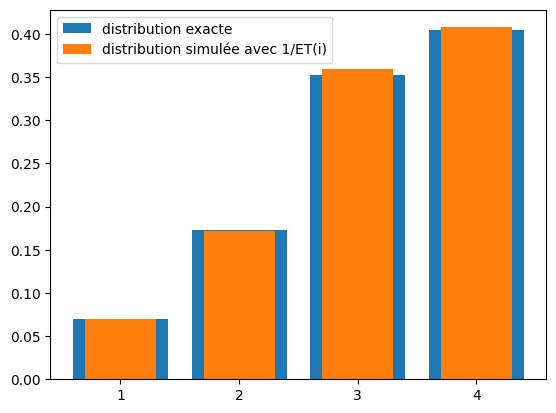

In [49]:
plt.figure()
plt.bar([1,2,3,4],Dist, label = "distribution exacte", width=0.8)
plt.bar([1,2,3,4],Inv_ET_i, label = "distribution simulée avec 1/ET(i)", width=0.6)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,3,4])
plt.legend()

# 2 Simulation des lois continues, application de Monte-Carlo.

## 2.1 Simulation d’un couple

Soit $(X, Y)$ un couple qui suit la loi uniforme sur $B$ avec
$B = \{(x,y)\in \mathbb{R}/-\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}\leq y\leq e^{-|x|}\}$.
 > (a) - On a: $$f_X(x) =\dfrac{1}{3}\left( \dfrac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}+ e^{-|x|}\right) $$

+ En utilisant la méthode de loi inverse, réalisons la simulation de la loi de densité $\dfrac{1}{2}e^{-|t|}$.
 La fonction inverse s'écrit: $$F^{-1}(u) =
\begin{cases}
    \log(2u) \ si \ 0< u< \frac{1}{2} \\
    \log{(2(1-u))} \ si \ \frac{1}{2} < u < 1
\end{cases}$$

In [50]:

# Simultion de la loi de densité f(t)

def Law():
    u = np.random.uniform()
    if 0 < u <0.5:
        return np.log(2*u)
    elif 0.5 < u < 1:
        return -np.log(2*(1-u))
# Loi normal centré-réduite

def BoxMul():
    u = np.random.uniform()
    v = np.random.uniform()
    return np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)

# Simultion de la loi de densité X

def SimulX():
    u = np.random.uniform()
    if u< 1/3:
        return BoxMul()
    else:
        return Law()

SimulX()

-0.4354768217022707

+ La simulation de $(X, Y)$

Puisque le couple $(X,Y)$ suit la loi uniforme sur $B$ alors sa fonction densité s'écrit:
$$f_{X,Y}(x,y) = \dfrac{1}{\mathcal{S}(B)}\mathbb{1}_B(x,y)$$
$\mathcal{S}(B) = \int_{B}dxdy = \large\int_{\mathbb{R}}\int_{-\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}}^{e^{-|x|}}dxdy =
\int_{\mathbb{R}}\left( \dfrac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}+ e^{-|x|}\right)dx= 3$

$f_{Y/_ {X = x}}(y) = \dfrac{f_{X,Y}(x,y)}{f_X(x)} = \dfrac{\mathbb{1}_{B}(x,y)}{3f_X(x)} =
\dfrac{1}{ \frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}+
e^{-|x|}}\mathbb{1}_{\left[-\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}, \ e^{-|x|}\right]}(y)
\iff Y/_{X=x} \sim \mathcal{U}\left(\left[-\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}, \ e^{-|x|}\right]\right)$

In [51]:
# Y/X=x suit la loi uniform sur [-f_1,f_2]
f_1 = lambda x: (np.e**(-(x**2)/2))/(np.sqrt(2*np.pi))
f_2 = lambda x: np.e**(-(np.abs(x)))

# Simulation du couple (X,Y)

def Y_x():
    x = SimulX()
    a = -f_1(x)
    b = f_2(x)
    y_x = np.random.uniform(a,b)
    return (x,y_x)

Y_x()[1]

-0.17642409831005912

> En utilisant la méthode de Monte Carlo, donnons une approximation de $\int\int_{B}e^{-|xy|}dxdy$

$\int\int_{B}e^{-|xy|}dxdy = \int\int_{B}(3e^{-|xy|})\dfrac{1}{3}\mathbb{1}_B(x,y)dxdy =
\operatorname{E}(3e^{-|XY|}) = \dfrac{1}{n}\sum_{i=1}^{n}3e^{-|x_iy_i|}$
+ Les $(x_i,y_i)$ sont des observations du couple $(X,Y)$

In [52]:
K = 10000
Approx_val = 0
for i in range(K):
    x,y = Y_x()
    Approx_val += (1/K)*3*np.e**(-np.abs(x*y))

Approx_val

2.694954524279129

## 2.2 La croissance Bactérienne :Escherichia coli (EC)

+ 1- Réalisons la simulation de la loi exponentielle de paramètre $\dfrac{1}{20}$.

In [53]:
def Exp(param):
    u = np.random.uniform(0,1)
    return (-np.log(1-u)/param)



+ Donnons l’instant de premier division


In [54]:
t = Exp(1/20)
t

12.63388737358004

+ 2- Donner l’instant auquel la cellule 1 va se deviser et l’instant correspondante à la
deuxième cellule.

In [55]:
t_1 = t+Exp(1/20)
t_2 = t+Exp(1/20)
print(f"La cellule 1 va se diviser à l'instant{t_1}")
print(f"La cellule 2 va se diviser à l'instant{t_2}")

La cellule 1 va se diviser à l'instant38.50666307993343
La cellule 2 va se diviser à l'instant17.264392027795065


+ 3- Donner tous les instants, entre 0 et 1000, auxquels une division cellulaire aura lieu.

In [59]:
Tmax = 1000
def T_div(Tmax):
    times_div = []
    t=0
    while t<Tmax:
        t+= Exp(1/20)
        times_div.append(t)
    return times_div

T_div(Tmax)

[12.37052206622573,
 27.444136736143022,
 37.8784662142894,
 73.24505126749705,
 79.03466409554059,
 105.556650859817,
 145.10832618174365,
 164.1635691476774,
 182.85121930590793,
 185.88936159101348,
 209.68265766132936,
 226.5211421788284,
 232.65217553351778,
 252.34215296763227,
 257.58655463504977,
 275.0998117960847,
 291.50294498304527,
 328.32415454699117,
 344.84098577935504,
 394.60890968052547,
 400.90098932706496,
 423.3908997709164,
 450.97579321959137,
 456.0003656866055,
 462.46575360853194,
 463.08488148298323,
 494.21665256582634,
 537.4781314502327,
 559.8224135899841,
 564.3133149743959,
 609.1378982040299,
 630.0059830269342,
 642.1329523258719,
 644.8993753036634,
 667.1809982457596,
 670.4721575510671,
 672.6907436256448,
 674.2080383284675,
 729.4567324201926,
 746.5467710682843,
 801.3157734594232,
 856.4392283559789,
 871.9360808708781,
 890.5052376830465,
 891.7298894136768,
 925.4015334788339,
 926.8128400538162,
 939.045085818015,
 955.1520675920905,
 991.5

+ 4- Soit $N(t)$ le nombre de cellules dans le milieu à l’instant t, tracer la
courbe $(t, N(t))$ avec $0 \leq t \leq 1000$.

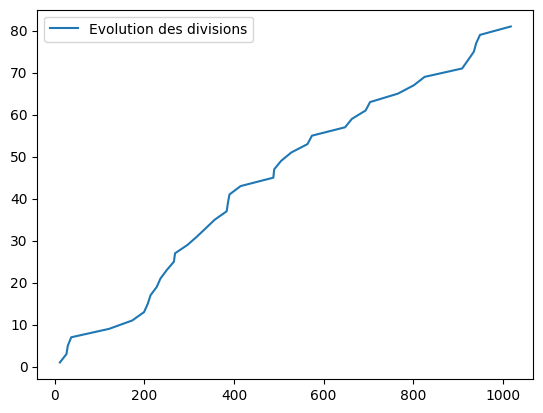

In [60]:
Inst_div = T_div(Tmax)
Nbre_cel = [2*k +1 for k in range(len(Inst_div))]

plt.plot(Inst_div,Nbre_cel, label = "Evolution des divisions")
plt.legend()